# Data cleaning and pre processing

In [1]:
import os
os.chdir("/Users/jam/msc/course-works")
print(os.getcwd())  # Verify the change

/Users/jam/msc/course-works


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [5]:
df = pd.read_csv("online_retail.csv")

In [7]:
# check data header
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
# check data types and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [11]:
# check data shape
print(f"Number of rows and columns: {df.shape}")

Number of rows and columns: (541909, 9)


In [13]:
# check data types
df.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Handle data types

In [16]:
# Convert CustomerID from float to int (handling NaN values first)
df["CustomerID"] = df["CustomerID"].fillna(0).astype(int)  # Replace NaN with 0 before conversion
# Print the updated data type
print(df["CustomerID"].dtype)

int64


In [18]:
# Convert InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Print the updated data type
print(df["InvoiceDate"].dtype)

datetime64[ns]


In [20]:
# check data types
df.dtypes

index                   int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [22]:
#Ensure no missing values are available in the dataset
print(df.isnull().sum())  

index             0
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [24]:
# Check for empty or null values
print(f"Number of null values for Description column: {df["Description"].isnull().sum()}")

Number of null values for Description column: 1454


In [26]:
# Check for '??' values
print(f"Rows with ?? values in the Description column: {df[df["Description"] == "??"].shape[0]}")

Rows with ?? values in the Description column: 7


In [28]:
#Fill missing description with StockCode
df['Description'] = df['Description'].fillna(df['StockCode'])
df.loc[df["Description"] == "??", "Description"] = df["StockCode"]

In [30]:
# Check for empty or null values

print(f"Number of null values for Description column after filna: {df["Description"].isnull().sum()}")

Number of null values for Description column after filna: 0


In [32]:
# Check for '??' values
print(f"Number of ?? values for Description column after filna: {df[df["Description"] == "??"].shape[0]}")

Number of ?? values for Description column after filna: 0


In [34]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [36]:
null_percentage = (df["CustomerID"].isnull().sum() / len(df)) * 100
print(f"Percentage of missing CustomerID values: {null_percentage:.2f}%")

Percentage of missing CustomerID values: 0.00%


In [38]:
# Due to higer percentage of missing customer id values, this could be due to guest checkouts, return transactions or invalid transactions

In [40]:
# Check for negative values in Quantity and UnitPrice
print(df[df["Quantity"] <= 0].shape[0], "rows with negative Quantity")
print(df[df["UnitPrice"] <= 0].shape[0], "rows with zero/negative UnitPrice")

10624 rows with negative Quantity
2517 rows with zero/negative UnitPrice


In [42]:
# Check rows where Quantity is negative and CustomerID is null
negative_quantity_null_customer = df[(df["Quantity"] <= 0) & (df["CustomerID"].isnull())]
print(f"Rows with negative Quantity and missing CustomerID: {negative_quantity_null_customer.shape[0]}")

unitprice_zero_negative_percentage = (df[df["Quantity"] <= 0].shape[0] / len(df)) * 100
print(f"Percentage of rows with zero/negative UnitPrice: {unitprice_zero_negative_percentage:.2f}%")

negative_quantity_null_customer.head()

Rows with negative Quantity and missing CustomerID: 0
Percentage of rows with zero/negative UnitPrice: 1.96%


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [124]:
# Negative or Zero value for Quantity can be due to human error, returned transactions, order cancelations or any other reason. 
# Negative or Zero value for UnitPrice can be due to human error or any other reason. 
# Filter data frame excluding invalid quantities and invalid unit prices

df_cleaned = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(df_cleaned[df_cleaned["Quantity"] <= 0].shape[0], "rows with negative Quantity")
print(df_cleaned[df_cleaned["UnitPrice"] <= 0].shape[0], "rows with zero/negative UnitPrice")

0 rows with negative Quantity
0 rows with zero/negative UnitPrice


In [126]:
print(df_cleaned.isnull().sum())  

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [128]:
null_percentage = (df_cleaned["CustomerID"].isnull().sum() / len(df_cleaned)) * 100
print(f"Percentage of missing CustomerID values: {null_percentage:.2f}%")

Percentage of missing CustomerID values: 0.00%


## Descriptive Analysis

In [131]:
df_cleaned.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [133]:
df_cleaned.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104.000000,530104,530104.000000,530104.000000
mean,271365.705603,10.542037,2011-07-04 20:16:05.225087744,3.907625,11479.646222
min,0.000000,1.000000,2010-12-01 08:26:00,0.001000,0.000000
25%,135688.750000,1.000000,2011-03-28 12:22:00,1.250000,12352.000000
50%,271600.500000,3.000000,2011-07-20 12:58:00,2.080000,14388.000000
75%,407182.250000,10.000000,2011-10-19 12:39:00,4.130000,16265.000000
max,541908.000000,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156559.013587,155.524124,NaN,35.915681,6781.976768


### Visualize distributions of numerical features using histograms 

#### Introduce Total Amount based on the Quantity and UnitPrice

In [137]:
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_52427/2071856700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [139]:
df_cleaned.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [141]:
df_cleaned.dtypes

index                   int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
TotalAmount           float64
dtype: object

In [143]:
# Summary statistics for numerical columns
df_cleaned[["TotalAmount", "UnitPrice", "Quantity"]].describe()

,TotalAmount,UnitPrice,Quantity
count,530104.000000,530104.000000,530104.000000
mean,20.121871,3.907625,10.542037
std,270.356743,35.915681,155.524124
min,0.001000,0.001000,1.000000
25%,3.750000,1.250000,1.000000
50%,9.900000,2.080000,3.000000
75%,17.700000,4.130000,10.000000
max,168469.600000,13541.330000,80995.000000


#### Detecting Skewed Data

In [147]:
# Check skewness
df_cleaned[["TotalAmount", "UnitPrice", "Quantity"]].skew()

TotalAmount    506.706012
UnitPrice      206.087555
Quantity       471.727716
dtype: float64

#### Correlation Between Numerical Features

In [150]:
# Compute correlation matrix
df_cleaned[["TotalAmount", "UnitPrice", "Quantity"]].corr()

,TotalAmount,UnitPrice,Quantity
TotalAmount,1.000000,0.137404,0.907338
UnitPrice,0.137404,1.000000,-0.003773
Quantity,0.907338,-0.003773,1.000000


In [152]:
# Calculate IQR
Q1 = df_cleaned[["TotalAmount", "UnitPrice", "Quantity"]].quantile(0.25)
Q3 = df_cleaned[["TotalAmount", "UnitPrice", "Quantity"]].quantile(0.75)
IQR = Q3 - Q1

# Define outliers (1.5*IQR rule)
outliers = ((df_cleaned[["TotalAmount", "UnitPrice", "Quantity"]] < (Q1 - 1.5 * IQR)) | 
            (df_cleaned[["TotalAmount", "UnitPrice", "Quantity"]] > (Q3 + 1.5 * IQR)))

# Count outliers per column
outliers.sum()

TotalAmount    42651
UnitPrice      37999
Quantity       56363
dtype: int64

#### Detecting outliers of Quantity

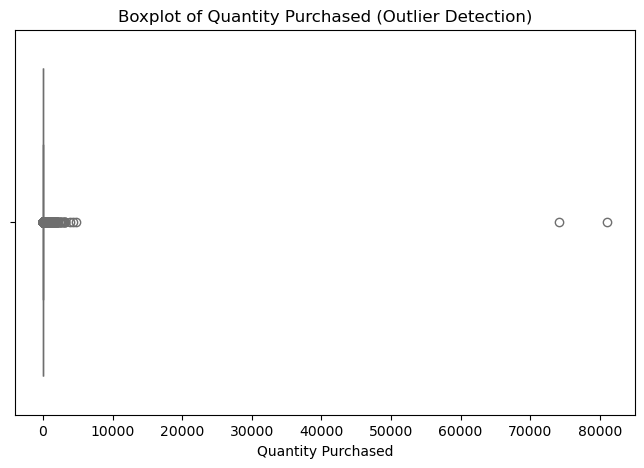

In [155]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["Quantity"], color="lightcoral")
plt.xlabel("Quantity Purchased")
plt.title("Boxplot of Quantity Purchased (Outlier Detection)")
plt.show()

In [157]:
# Calculate IQR
Q1 = df_cleaned[["Quantity"]].quantile(0.25)
print(Q1)
Q3 = df_cleaned[["Quantity"]].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR) 

print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

# Define outliers (1.5*IQR rule)
outliers_top = ((df_cleaned[["Quantity"]] > (upper_bound)))

print(outliers_top.sum())

Quantity    1.0
Name: 0.25, dtype: float64
Quantity    10.0
Name: 0.75, dtype: float64
Quantity    9.0
dtype: float64
lower_bound: Quantity   -12.5
dtype: float64
upper_bound: Quantity    23.5
dtype: float64
Quantity    56363
dtype: int64


In [159]:
df_cleaned = df_cleaned[df_cleaned["Quantity"] < 10000]

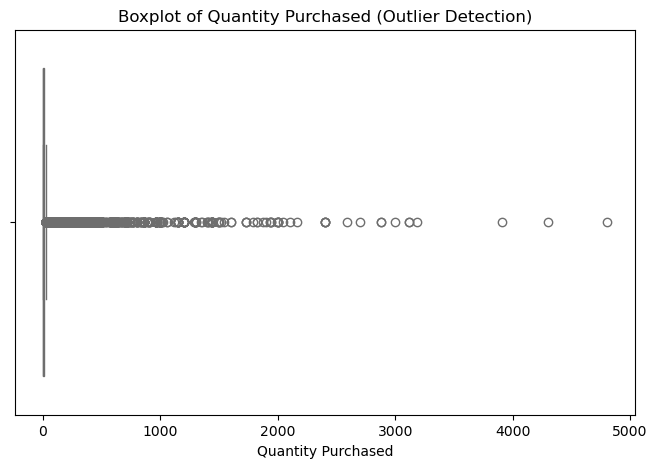

In [161]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["Quantity"], color="lightcoral")
plt.xlabel("Quantity Purchased")
plt.title("Boxplot of Quantity Purchased (Outlier Detection)")
plt.show()

In [195]:
temp = df_cleaned[df_cleaned["Quantity"] > 2500]
print(temp.shape)

(11, 10)


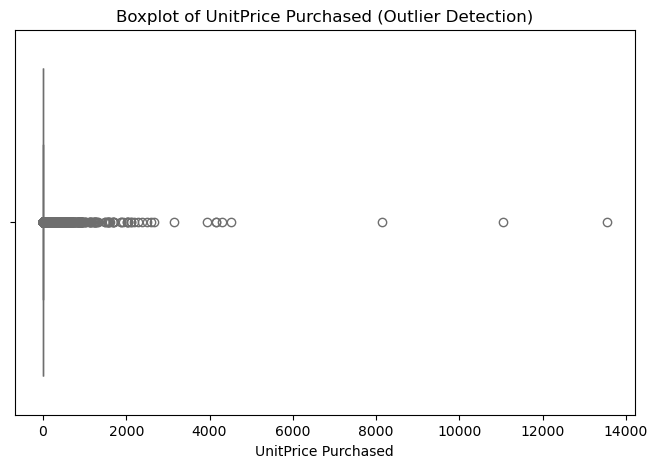

In [187]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["UnitPrice"], color="lightcoral")
plt.xlabel("UnitPrice Purchased")
plt.title("Boxplot of UnitPrice Purchased (Outlier Detection)")
plt.show()

In [189]:
temp = df_cleaned[df_cleaned["UnitPrice"] > 6000]
print(temp.shape)

(3, 10)


In [191]:
df_cleaned = df_cleaned[df_cleaned["UnitPrice"] < 6000]

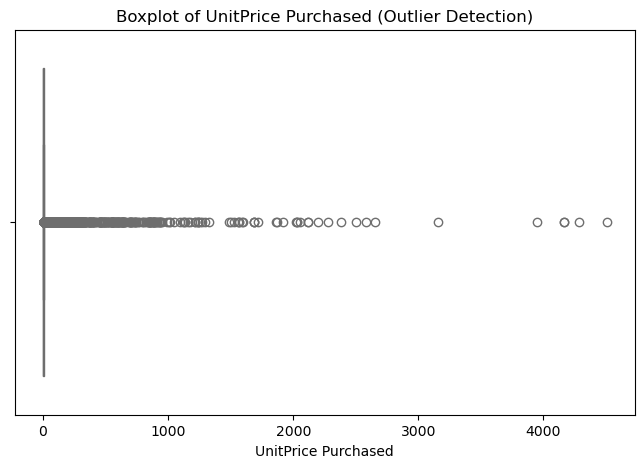

In [193]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["UnitPrice"], color="lightcoral")
plt.xlabel("UnitPrice Purchased")
plt.title("Boxplot of UnitPrice Purchased (Outlier Detection)")
plt.show()

In [201]:
temp = df_cleaned[df_cleaned["UnitPrice"] > 2500]
print(temp.shape)

(8, 10)


In [203]:
df_cleaned = df_cleaned[df_cleaned["UnitPrice"] < 2500]

In [205]:
temp = df_cleaned[df_cleaned["Quantity"] > 2500]
print(temp.shape)

(11, 10)


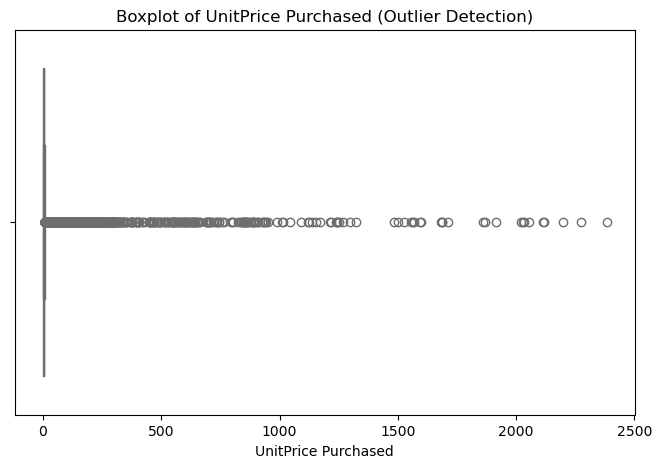

In [207]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["UnitPrice"], color="lightcoral")
plt.xlabel("UnitPrice Purchased")
plt.title("Boxplot of UnitPrice Purchased (Outlier Detection)")
plt.show()

In [209]:
df_cleaned = df_cleaned[df_cleaned["Quantity"] < 2500]

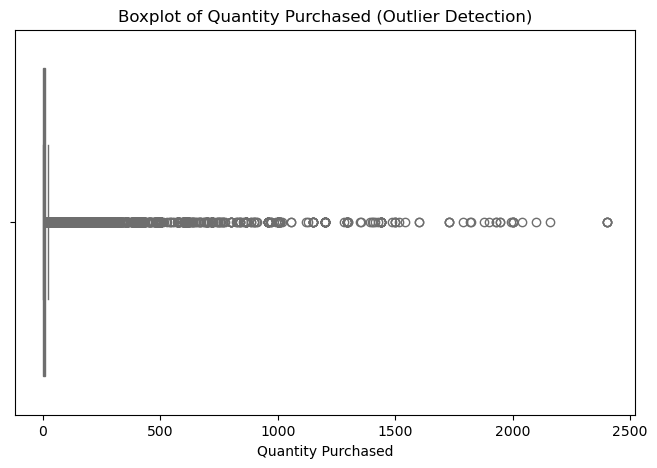

In [211]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["Quantity"], color="lightcoral")
plt.xlabel("Quantity Purchased")
plt.title("Boxplot of Quantity Purchased (Outlier Detection)")
plt.show()

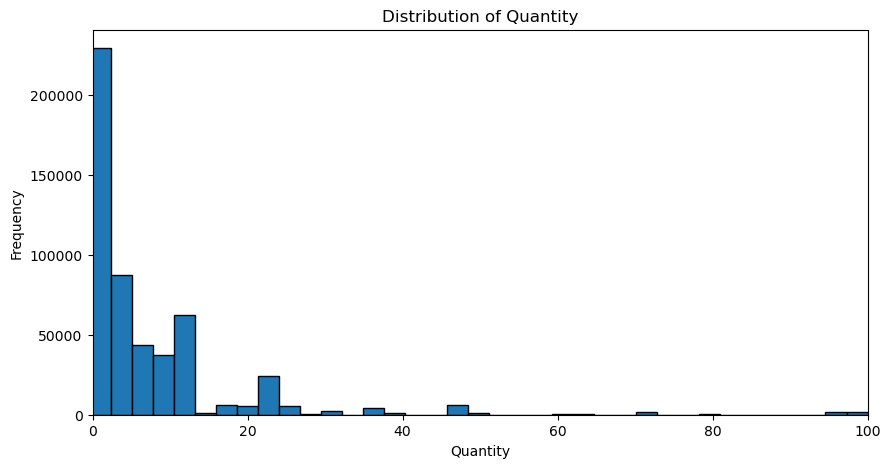

In [227]:
# Visualize distributions of numerical features using histograms
bin_edges = np.linspace(-60, 100, 60)

# Plot histogram for 'quantity'
plt.figure(figsize=(10, 5))
plt.hist(df_cleaned['Quantity'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.show()


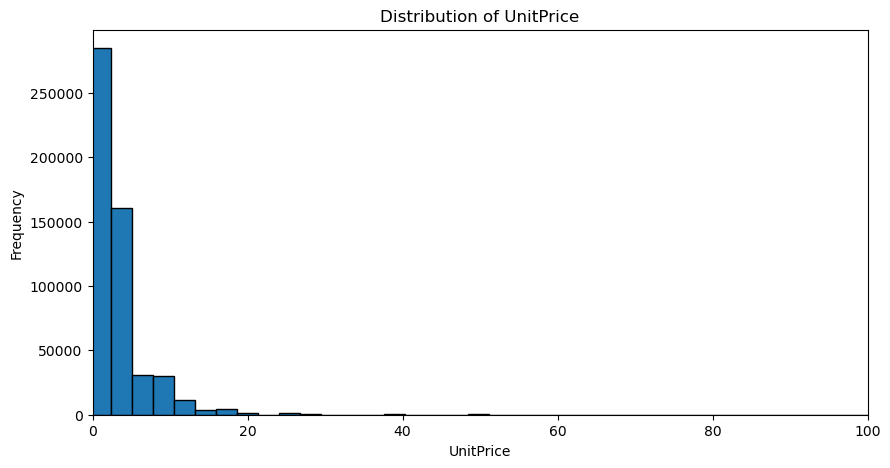

In [229]:
# Visualize distributions of numerical features using histograms
bin_edges = np.linspace(-60, 100, 60)

# Plot histogram for 'quantity'
plt.figure(figsize=(10, 5))
plt.hist(df_cleaned['UnitPrice'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.show()


#### Visualizing Correlation Between Numerical Features

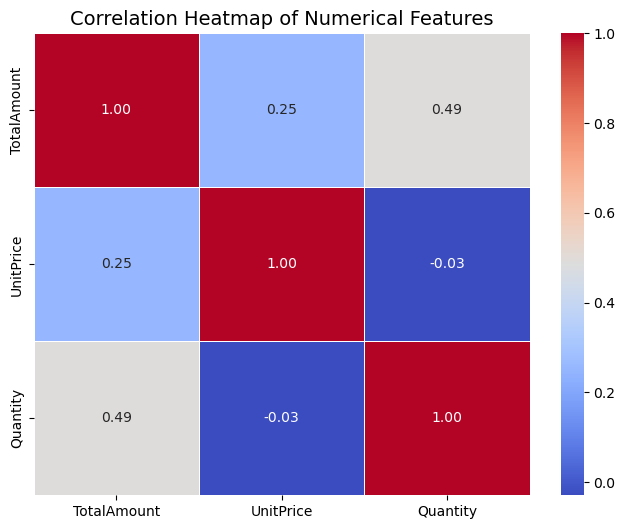

In [234]:
# Compute correlation matrix
correlation_matrix = df_cleaned[["TotalAmount", "UnitPrice", "Quantity"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Set title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)

# Show plot
plt.show()